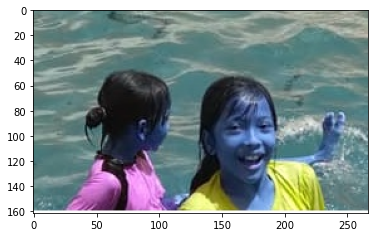

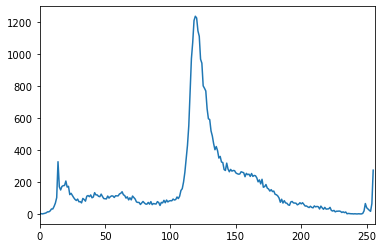

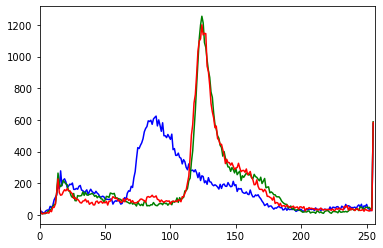

In [1]:
"""
Week2: Histogram equalization examples
"""

from matplotlib import pyplot as plt
import cv2

# read the image
im = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg')
plt.imshow(im)
plt.show()

# calculate the histogram over grayscale image
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
hist_gray = cv2.calcHist([gray_im], [0], None, [256], [0, 256])

plt.plot(hist_gray)
plt.xlim([0, 256])
plt.show()

# calculate the histogram over bgr, for each channel
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist_channel = cv2.calcHist([im], [i], None, [256], [0, 256])
    plt.plot(hist_channel, color=col)
    plt.xlim([0, 256])
plt.show()


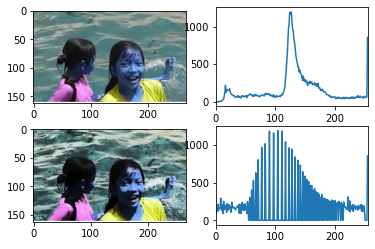

In [3]:
# histogram equalization cannot be applied directly on the rgb channels.
# intensity values should equalized without disturbing the color balance.
# convert the color space to which separates intensity values from color components such as hsv
# calculate the histogram over intensity channel: value

hsv_im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
hist_before = cv2.calcHist([hsv_im], [2], None, [256], [0, 256])

hsv_im[:, :, 2] = cv2.equalizeHist(hsv_im[:, :, 2])
hist_after = cv2.calcHist([hsv_im], [2], None, [256], [0, 256])

eq_im = cv2.cvtColor(hsv_im, cv2.COLOR_HSV2BGR)

plt.subplot(221)
plt.imshow(im)

plt.subplot(222)
plt.plot(hist_before)
plt.xlim([0, 256])

plt.subplot(223)
plt.imshow(eq_im)

plt.subplot(224)
plt.plot(hist_after)
plt.xlim([0, 256])

plt.show()



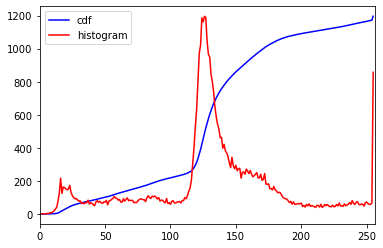

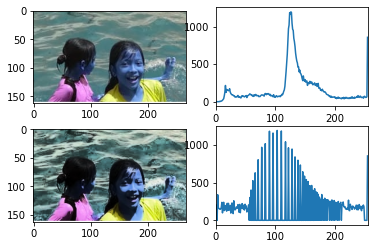

In [4]:
# implement equalizeHist() function by yourself
# example from: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
# find details in a blog post:
# https://lmcaraig.com/image-histograms-histograms-equalization-and-histograms-comparison/#histogramequalization
hsv_im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
hist_before = cv2.calcHist([hsv_im], [2], None, [256], [0, 256])

# the CDF quantifies the probability of observing certain pixel intensities.
cdf = hist_before.cumsum()  # calculate the cdf of the image histogram
cdf_normalized = cdf * hist_before.max() / cdf.max()  # normalize the cdf according to bins to visualize it

plt.plot(cdf_normalized, color='b')
plt.plot(hist_before, color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

# mapping one distribution (the given histogram) to another distribution
# (a wider and more uniform distribution of intensity values)
cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())  # scale the cdf values into [0, 255]
cdf = cdf.astype('uint8')

hsv_im[:, :, 2] = cdf[hsv_im[:, :, 2]]  # find the transition of intensity values from cdf
eq_im = cv2.cvtColor(hsv_im, cv2.COLOR_HSV2BGR)

hist_after = cv2.calcHist([hsv_im], [2], None, [256], [0, 256])

plt.subplot(221)
plt.imshow(im)

plt.subplot(222)
plt.plot(hist_before)
plt.xlim([0, 256])

plt.subplot(223)
plt.imshow(eq_im)

plt.subplot(224)
plt.plot(hist_after)
plt.xlim([0, 256])

plt.show()
